In [16]:
# Import libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import operator
SAVEPATH = './screenshot'
os.makedirs(SAVEPATH, exist_ok=True) 

In [2]:
# GET request from api as json file
response = requests.get('https://api.covid19api.com/country/singapore/status/confirmed')
res = response.text

# Converting json file to df
covid = pd.read_json(res)
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 928 entries, 0 to 927
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   Country      928 non-null    object             
 1   CountryCode  928 non-null    object             
 2   Province     928 non-null    object             
 3   City         928 non-null    object             
 4   CityCode     928 non-null    object             
 5   Lat          928 non-null    float64            
 6   Lon          928 non-null    float64            
 7   Cases        928 non-null    int64              
 8   Status       928 non-null    object             
 9   Date         928 non-null    datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), float64(2), int64(1), object(6)
memory usage: 72.6+ KB


## Data Cleaning

In [3]:
# Groupby yearly quarters, and extracting the last record
quarterly_df = covid.groupby(covid.Date.dt.to_period('Q')).nth(-1)

# Tabulating the quarterly difference 
quarterly_df['quarterly diff'] = quarterly_df.Cases.diff()
quarterly_df = quarterly_df [['Cases','quarterly diff']]


C:\Users\alyss\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1146: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


In [4]:
# Replacing Nan with 0s
quarterly_df = quarterly_df.fillna(0)
final = quarterly_df.reset_index()


## Data visualization
Plotting the total number of cases in Singapore per quarter and the quarterly difference, against date

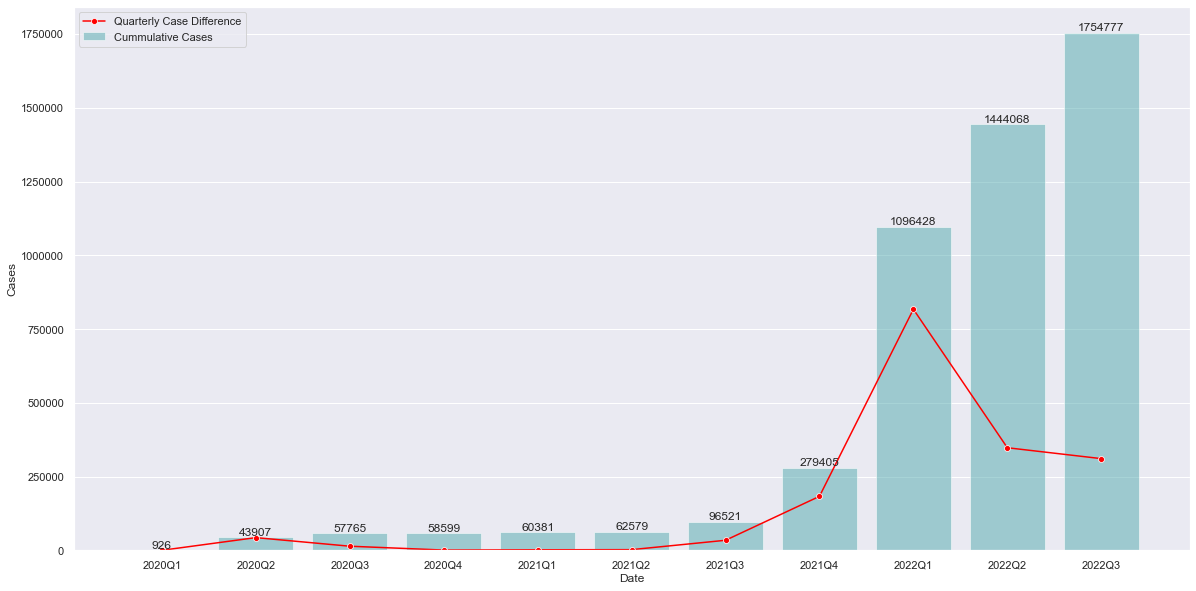

In [17]:
sns.set()
ax1 = sns.set_style(style=None, rc=None )
fig, ax1 = plt.subplots(figsize=(20,10))
sns.barplot(data = final, x='Date', y='Cases', color ='#42b7bd', label='Cummulative Cases', alpha=0.5, ax=ax1)
sns.lineplot(data = final['quarterly diff'], marker='o', color = 'red', label='Quarterly Case Difference', ax=ax1)
plt.ticklabel_format(style='plain', axis='y')

# Displaying data points
for i in ax1.containers:
    ax1.bar_label(i,fmt = '%d')

plt.savefig(os.path.join(SAVEPATH, 'covid_cases_Singapore.pdf'), dpi=None, bbox_inches='tight', pad_inches=0)
plt.show()
